Caso:
En una clínica infantil se ha ido anotando, durante un mes, el número de
metros que cada niño anda, seguido y sin caerse, el primer día que comienza
a caminar, obteniéndose la tabla de información adjunta:

| Metros | Niños |
|--------|-------|
|   1    |  2    |
|   2    |  6    |
|   3    |  10   |
|   4    |  5    |
|   5    |  10   |
|   6    |  3    |
|   7    |  2    |
|   8    |  2    |


In [17]:
import pandas as pd
import numpy as np
#import statistics as stat

# Ingreso de datos
tabla = pd.DataFrame(
    {
        'Metros': range(1,9), # 6,7,8,9,10
        'Niños': [2,6,10,5,10,3,2,2]
    }
)

print(tabla)

   Metros  Niños
0       1      2
1       2      6
2       3     10
3       4      5
4       5     10
5       6      3
6       7      2
7       8      2


a) Tabla de Frecuencia. Diagrama de Barras para las frecuencias
absolutas, relativas y acumuladas.


In [18]:
#Se usó como frecuencia absoluta a los niños
# Cálculo frecuencia acumulada
tabla['Frec acumulada'] = tabla['Niños'].cumsum() #cumsum se usa para sacar la suma acumulativa
#print(tabla)

# Cálculo de la frecuencia total de los niños
frecuencia_total = tabla['Niños'].sum()
#print(frecuencia_total)

# Cálculo de la frecuencia relativa
tabla['Frec relativa'] = tabla['Niños'] / frecuencia_total
#print(tabla)

# Cálculo de la frecuencia acumulada relativa
tabla['Frec acumulada relativa'] = tabla['Frec relativa'].cumsum()
print(tabla)

   Metros  Niños  Frec acumulada  Frec relativa  Frec acumulada relativa
0       1      2               2          0.050                    0.050
1       2      6               8          0.150                    0.200
2       3     10              18          0.250                    0.450
3       4      5              23          0.125                    0.575
4       5     10              33          0.250                    0.825
5       6      3              36          0.075                    0.900
6       7      2              38          0.050                    0.950
7       8      2              40          0.050                    1.000


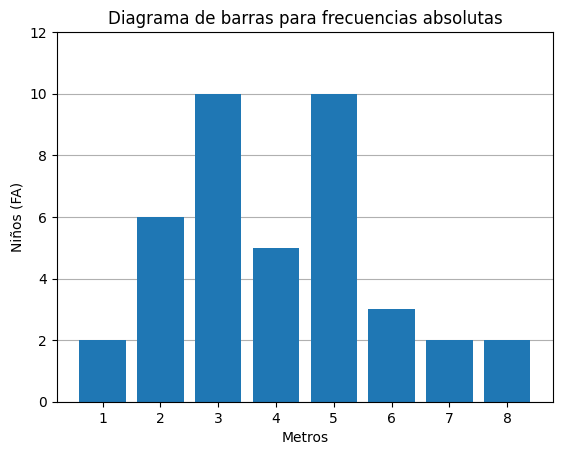

In [42]:
import matplotlib.pyplot as plt

plt.bar(tabla['Metros'], tabla['Niños'])
plt.xlabel('Metros')
plt.ylabel('Niños (FA)')
plt.yticks(range(0,13,2))
plt.title('Diagrama de barras para frecuencias absolutas')
plt.grid(True, axis='y')
plt.gca().set_axisbelow(True) # Indicar que las lineas de la grilla queden detrás de lo graficado
plt.show()

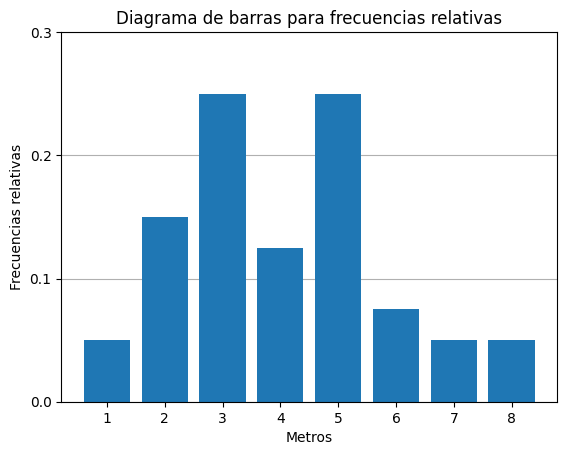

In [50]:
plt.bar(tabla['Metros'], tabla['Frec relativa'])
plt.xlabel('Metros')
plt.ylabel('Frecuencias relativas')
plt.yticks([i/10 for i in range(0, 4, 1)])
plt.title('Diagrama de barras para frecuencias relativas')
plt.grid(True, axis='y')
plt.gca().set_axisbelow(True) # Indicar que las lineas de la grilla queden detrás de lo graficado
plt.show()

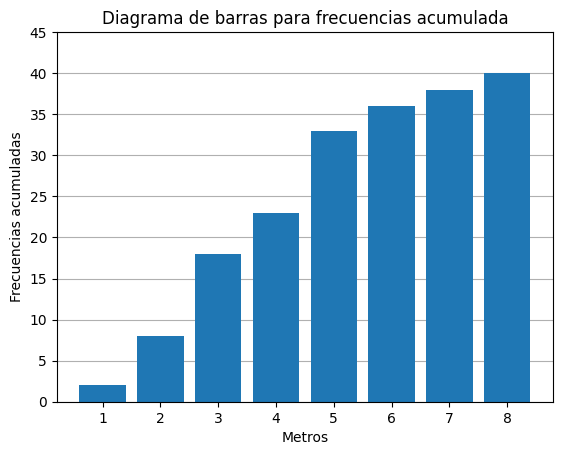

In [51]:
plt.bar(tabla['Metros'], tabla['Frec acumulada'])
plt.xlabel('Metros')
plt.ylabel('Frecuencias acumuladas')
plt.yticks(range(0,46,5))
plt.title('Diagrama de barras para frecuencias acumulada')
plt.grid(True, axis='y')
plt.gca().set_axisbelow(True) # Indicar que las lineas de la grilla queden detrás de lo graficado
plt.show()

b) Mediana, media aritmética, moda y cuartiles.


In [31]:
# Media
ninos = np.repeat(tabla['Metros'], tabla['Niños']).to_list()
#repeat() (de numpy) repite lo de la columna metros, la cantidad de veces que le indica la columna niños
#to_list lleva el resultado anterior (serie) a una lista
media = sum(ninos)/len(ninos)#suma los valores y los divide por el largo
print(f'Media: {media}')

# Mediana
mediana = np.median(np.array(ninos))#a median() le entregamos el arreglo y nos devuelve la mediana
print(f'Mediana: {mediana}')

# Moda
moda = tabla[tabla['Niños']==max(tabla['Niños'])]['Metros']
#buscamos el valor máximo de la columna niños y buscamos el o los valores que coincidan con ese máximo
#y que me muestre a cuántos metros corresponde
print(f'El resultado es bimodal: {moda[2]} y {moda[4]} metros')

Media: 4.05
Mediana: 4.0
El resultado es bimodal: 3 y 5 metros


In [35]:
# Calcular los cuartiles
# Cálculo de la frecuencia acumulada relativa%
tabla['Frec acu rel %'] = tabla['Frec acumulada relativa'] *100
print(tabla['Frec acu rel %'])

0      5.0
1     20.0
2     45.0
3     57.5
4     82.5
5     90.0
6     95.0
7    100.0
Name: Frec acu rel %, dtype: float64


Según los porcentajes entregados por las frecuencias relativas acumuladas de la tabla,
estos porcentajes exactos no existen, por lo tanto se toman los inmediatamente superiores, quedándo: 25% =3, 50%=4 y 75%=5

c) Varianza y desviación Estándar.

In [39]:
# Varianza
varianza = np.var(ninos)
print(f'Varianza: {varianza:.4f}')

# Desviacion estandar
dest = np.std(ninos)
print(f'Desviacion estándar: {dest:.4f}')

Varianza: 3.0975
Desviacion estándar: 1.7600


d) ¿Entre qué dos valores se encuentra, como mínimo, el 75% de las
observaciones?


 El Teorema de Chebyshev garantiza que, como mínimo, el (1−
1/k
2
)· 100% de los datos se concentran en el intervalo (x−kσ,
x+kσ) y, por tanto, fuera de dicho intervalo se encuentra, a lo
sumo, el 1/k
2
· 100% de ellos.
Conforme a este teorema, imponemos que:

$$
\ 75 \ = {(1 - 1/k^2)} {* 100 }
$$

donde $k$=2.



In [57]:
#Intervalo de confianza
inferior = media - 2 * dest
superior = media + 2 * dest
print(f'Al menos el 75% de los datos se encuentran entre los valores {inferior:.2f} y {superior:.2f}')

Al menos el 75% de los datos se encuentran entre los valores 0.53 y 7.57
